In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import matplotlib.pyplot as plt

Exploratory Data Analysis. Show at least the following:

Show the shape of the datasets.
Render 5 images from each label to show that you know how to assemble an image from the dataset.
Pick ONE label that you will be using for probabability that the item/animal is there.

In [3]:
# X = Images, Y = Labels

# X_train: Contains the training images
# X_test: Contains the test images
# Y_train: Contains the training labels
# Y_test: Contains the test labels 

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()


In [4]:
X_train.shape # 50,000 training images, 32 by 32 in size
# first index is the image, 2nd and 3rd are the x and y coordinates, and the 4th one is the colour channels

(50000, 32, 32, 3)

In [5]:
X_test.shape # each test batch has 10,000 images.

(10000, 32, 32, 3)

In [6]:
X_train[0] # We can see that each cell is a 32 by 32 array, split into 3 rgb channels
# values lie between 0 and 255

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
y_train.shape # 50,000 samples as well

(50000, 1)

In [8]:
y_train[:5] # 6 is frog, 9 is ship as examples
X_train[0] 
y_train[0]


array([6], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,) # reshaping data into 1 dimensional array. Keeping 10,000 and flattening
y_train[:5] # we see here that each index for y returns a number representing the type

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
# creating a function which prints the particular image sample
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

def plot_sample(X, y, index):

    
    plt.figure(figsize = (15,2))
    plt.imshow(X[index]) # showing image from X index
    plt.xlabel(classes[y[index]]) # using number from y to return classes index

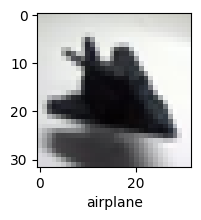

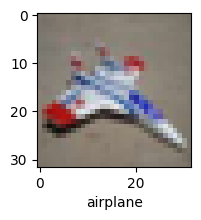

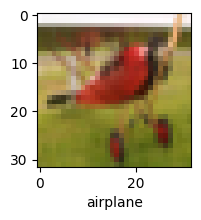

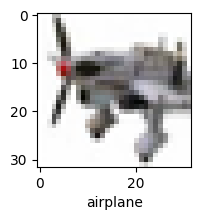

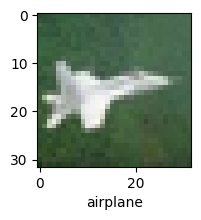

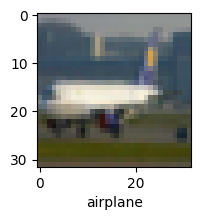

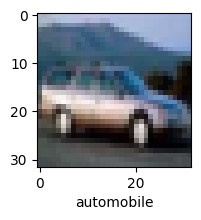

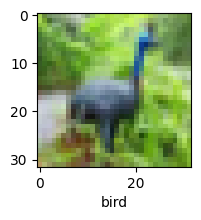

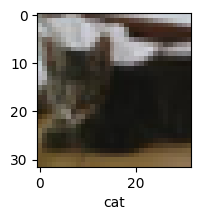

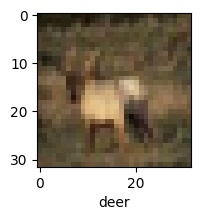

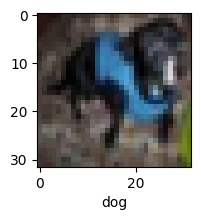

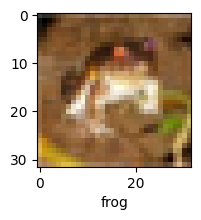

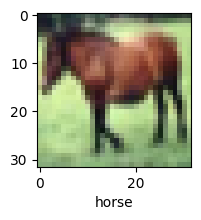

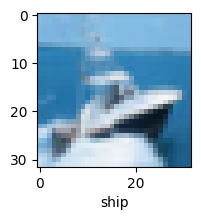

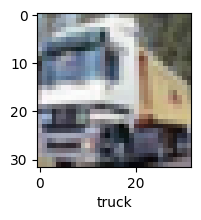

In [15]:

count = 0

for j in range(10):

   for i in range(len(y_train)):
      if y_train[i] == j: # Plotting airplane. Repeat from 0 to 10 to render images from dataset
         plot_sample(X_train, y_train, i)
         count += 1
         if count > 5:
            break
      

Picking airplane as the label to use

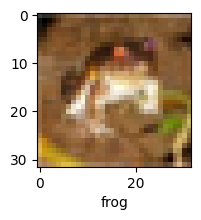

In [ ]:
plot_sample(X_train, y_train, 0)

Data Processing. Do at least the following:

Obtain your training and testing dataset. Use the data batches as how they are meant to be used.
Ensure that there is no data imbalance between the images belonging to the label you selected. Simply, there should be 10000 data entries for training and 2000 for testing.

In [ ]:
train_index = np.random.randint(0,50000, size = 10000)
test_index = np.random.randint(0,10000, size = 2000)

train_x = X_train[train_index]
train_y = y_train[train_index]

test_x = X_test[test_index]
test_y = y_test[test_index]

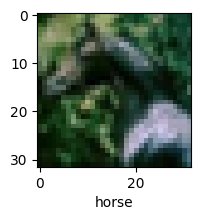

In [ ]:
plot_sample(train_x, train_y, 0)

In [ ]:
# Using airplane as the probability that the item/animal is there. airplane comes up 1/10 times roughly which is good
count = 0
for i in range(len(train_y)):
   if train_y[i] == 0:
      count += 1

print(count)

NameError: name 'train_y' is not defined

In [ ]:
# normalising the values
X_train = X_train / 255
X_test = X_test / 255

train_x = train_x /255
test_x = test_x /255

In [ ]:
# First model ANN - artificial neural network (better for regression)
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)), 
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid') # for the 10 categories
    ])

ann.compile(optimizer='SGD',
    loss='sparse_categorical_crossentropy', # y is directly a value, so we use sparse categorical
    metrics=['accuracy'])

history2 = ann.fit(train_x, train_y, epochs=5, validation_data=(test_x, test_y))

Epoch 1/5
313/313 [==============================] - 24s 77ms/step - loss: 2.0073 - accuracy: 0.2763 - val_loss: 2.0174 - val_accuracy: 0.2330
Epoch 2/5
313/313 [==============================] - 24s 76ms/step - loss: 1.8256 - accuracy: 0.3489 - val_loss: 1.8368 - val_accuracy: 0.3310
Epoch 3/5
313/313 [==============================] - 23s 75ms/step - loss: 1.7422 - accuracy: 0.3873 - val_loss: 1.7837 - val_accuracy: 0.3560
Epoch 4/5
313/313 [==============================] - 24s 75ms/step - loss: 1.6846 - accuracy: 0.4059 - val_loss: 1.7672 - val_accuracy: 0.3655
Epoch 5/5
313/313 [==============================] - 24s 76ms/step - loss: 1.6322 - accuracy: 0.4316 - val_loss: 1.6835 - val_accuracy: 0.4110


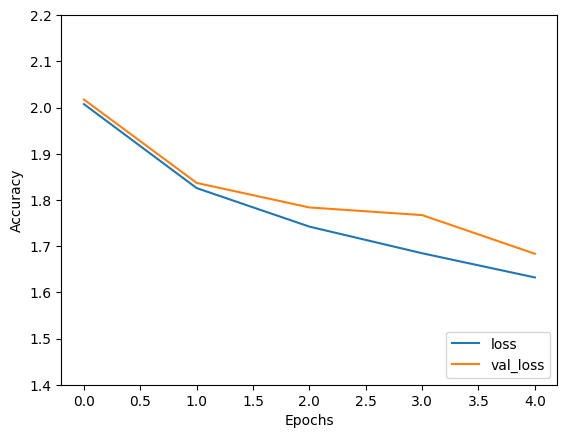

In [ ]:
plt.plot(history2.history['loss'], label = 'loss')
plt.plot(history2.history["val_loss"], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([1.4,2.2])
plt.legend(loc = 'lower right')

In [ ]:
#checking performance of dataset
ann.evaluate(test_x, test_y)

63/63 [==============================] - 1s 18ms/step - loss: 1.6835 - accuracy: 0.4110


[1.6834756135940552, 0.41100001335144043]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(test_x)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(test_y, y_pred_classes))

# looking at the report, the scores are performing quite poorly.

63/63 [==============================] - 1s 18ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.42      0.44      0.43       190
           1       0.60      0.35      0.44       215
           2       0.30      0.41      0.34       199
           3       0.39      0.21      0.27       205
           4       0.52      0.06      0.10       208
           5       0.36      0.27      0.31       197
           6       0.44      0.62      0.51       207
           7       0.45      0.49      0.47       195
           8       0.48      0.62      0.54       186
           9       0.35      0.69      0.47       198

    accuracy                           0.41      2000
   macro avg       0.43      0.41      0.39      2000
weighted avg       0.43      0.41      0.39      2000



In [ ]:
# 2nd Method, using CNN 
model = Sequential()
model.add(Conv2D(64,(3,3), activation="relu", input_shape = (32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2)) #  To prevent model from overfitting, random neurons will be dropped out randomly
model.add(Conv2D(128,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten()) # Flatten all dimensions into 1D array to be filtered by dense layer
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax" )) # 10 Layers for 10 classes, using softmax because it is the output layer

In [ ]:
# NEW COMPILE
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy']) # We have more than 2 classes, so categorical crossentropy is used

history = model.fit(train_x, train_y, epochs=10, validation_data=(test_x, test_y))
model.save('cifar.h5')

Epoch 1/10
313/313 [==============================] - 16s 50ms/step - loss: 1.9111 - accuracy: 0.2991 - val_loss: 1.7239 - val_accuracy: 0.3755
Epoch 2/10
313/313 [==============================] - 16s 50ms/step - loss: 1.5108 - accuracy: 0.4582 - val_loss: 1.4157 - val_accuracy: 0.4940
Epoch 3/10
313/313 [==============================] - 15s 49ms/step - loss: 1.3524 - accuracy: 0.5167 - val_loss: 1.3254 - val_accuracy: 0.5340
Epoch 4/10
313/313 [==============================] - 16s 50ms/step - loss: 1.2150 - accuracy: 0.5661 - val_loss: 1.2944 - val_accuracy: 0.5410
Epoch 5/10
313/313 [==============================] - 15s 49ms/step - loss: 1.1211 - accuracy: 0.6075 - val_loss: 1.3489 - val_accuracy: 0.5290
Epoch 6/10
313/313 [==============================] - 15s 48ms/step - loss: 1.0339 - accuracy: 0.6340 - val_loss: 1.2152 - val_accuracy: 0.5820
Epoch 7/10
313/313 [==============================] - 14s 46ms/step - loss: 0.9486 - accuracy: 0.6615 - val_loss: 1.2667 - val_accuracy:

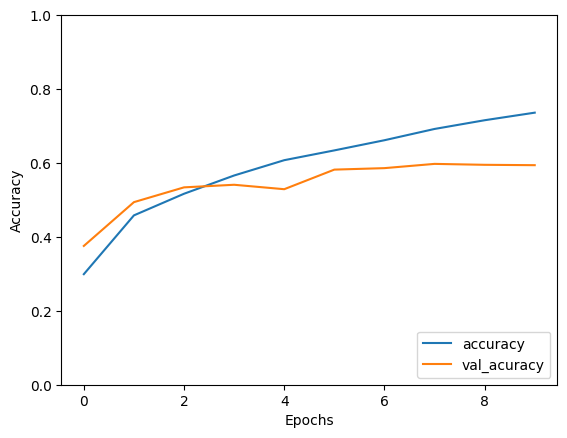

In [ ]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label='val_acuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc = 'lower right')

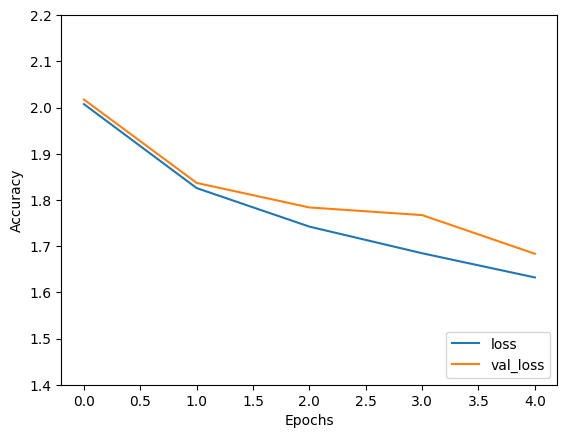

In [ ]:
plt.plot(history2.history['loss'], label = 'loss')
plt.plot(history2.history["val_loss"], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([1.4,2.2])
plt.legend(loc = 'lower right')

In [ ]:
model.evaluate(test_x, test_y)

63/63 [==============================] - 1s 13ms/step - loss: 1.2043 - accuracy: 0.5940


[1.2042794227600098, 0.593999981880188]

In [ ]:
# Hyperparameter Tuning
model2 = Sequential()
model2.add(Conv2D(128,(3,3), activation="relu", input_shape = (32,32,3)))
model2.add(MaxPooling2D((2,2)))
model2.add(Dropout(0.2)) #  To prevent model from overfitting, random neurons will be dropped out randomly
model2.add(Conv2D(128,(3,3), activation="relu"))
model2.add(MaxPooling2D((2,2)))
model2.add(Dropout(0.2))
model2.add(Flatten()) # Flatten all dimensions into 1D array to be filtered by dense layer
model2.add(Dense(64, activation="relu"))
model2.add(Dense(10, activation="softmax" )) # 10 Layers for 10 classes, using softmax because it is the output layer

In [ ]:
# NEW COMPILE
model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy']) # We have more than 2 classes, so categorical crossentropy is used

history = model2.fit(train_x, train_y, epochs=15, validation_data=(test_x, test_y))

Epoch 1/15
313/313 [==============================] - 26s 83ms/step - loss: 1.9141 - accuracy: 0.2926 - val_loss: 1.6145 - val_accuracy: 0.4075
Epoch 2/15
313/313 [==============================] - 27s 85ms/step - loss: 1.5346 - accuracy: 0.4442 - val_loss: 1.4466 - val_accuracy: 0.4955
Epoch 3/15
313/313 [==============================] - 28s 90ms/step - loss: 1.4017 - accuracy: 0.4949 - val_loss: 1.4328 - val_accuracy: 0.5060
Epoch 4/15
313/313 [==============================] - 29s 93ms/step - loss: 1.2826 - accuracy: 0.5391 - val_loss: 1.3311 - val_accuracy: 0.5205
Epoch 5/15
313/313 [==============================] - 27s 86ms/step - loss: 1.1905 - accuracy: 0.5713 - val_loss: 1.2946 - val_accuracy: 0.5495
Epoch 6/15
313/313 [==============================] - 26s 84ms/step - loss: 1.0928 - accuracy: 0.6141 - val_loss: 1.2955 - val_accuracy: 0.5475
Epoch 7/15
313/313 [==============================] - 27s 86ms/step - loss: 1.0130 - accuracy: 0.6443 - val_loss: 1.2596 - val_accuracy:

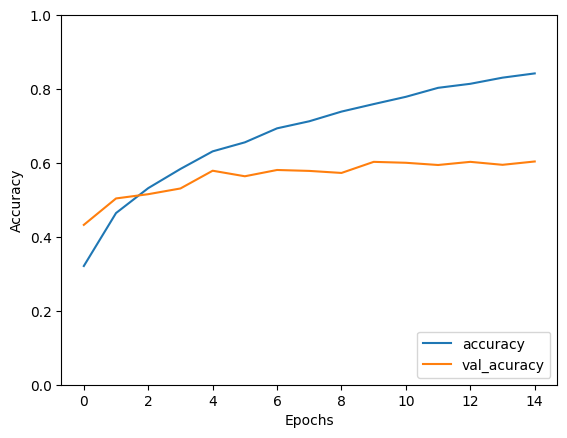

In [ ]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label='val_acuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc = 'lower right')

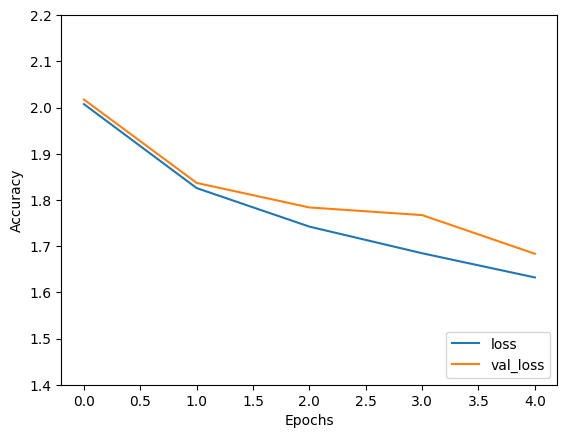

In [ ]:
plt.plot(history2.history['loss'], label = 'loss')
plt.plot(history2.history["val_loss"], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([1.4,2.2])
plt.legend(loc = 'lower right')

In [ ]:
model2.evaluate(test_x, test_y)

63/63 [==============================] - 1s 19ms/step - loss: 1.4887 - accuracy: 0.6040


[1.488675594329834, 0.6039999723434448]

Hypertuning is utilised in the final model in `finalmodel.ipynb`.